# Case Study: Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

**1. Read the dataset to the python environment.**

In [2]:
data=pd.read_csv("Wine.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

___________________________________________________________________
**2. Try out different clustering models in the wine dataset.**

**3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.**

In [5]:
Wdata = pd.DataFrame(StandardScaler().fit_transform(data) , columns=data.columns, index =data.index)

In [6]:
n=range(1,10)
wd=[]
for i in n:
    model=KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(Wdata)
    wd.append(model.inertia_)
    print(model.inertia_)

2313.9999999999986
1659.0079672511504
1277.928488844643
1181.801643666161
1105.116299568019
1048.691217229243
994.5388520185525
942.2333198141857
889.1176328771544


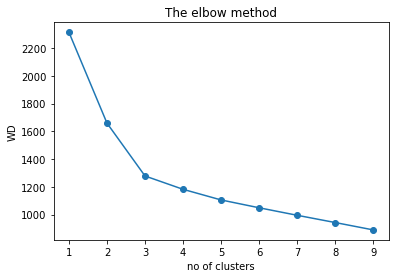

In [7]:
plt.plot(n,wd,'-o')
plt.xlabel('no of clusters')
plt.ylabel('WD')
plt.title("The elbow method")
plt.show()

**_Number od Clusters : 3_**

In [8]:
model = KMeans(n_clusters = 3 , init ="k-means++" ,random_state=42)
model.fit(Wdata)

KMeans(n_clusters=3, random_state=42)

In [9]:
model_clusters = model.labels_
model_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [10]:
output = Wdata.copy()
output["kmeans-cluster"] = model_clusters
output.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0


In [13]:
import warnings
warnings.filterwarnings('ignore')

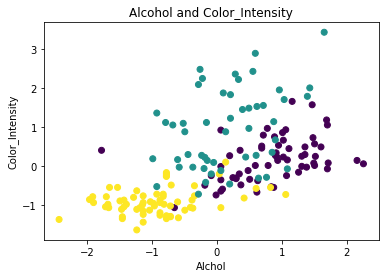

In [15]:
plt.title("Alcohol and Color_Intensity")
plt.scatter(Wdata["Alcohol"], Wdata["Color_Intensity"], c = model_clusters)
plt.xlabel("Alchol")
plt.ylabel("Color_Intensity")
plt.show()

__________________________________________________
**Heirarchcal clustering**

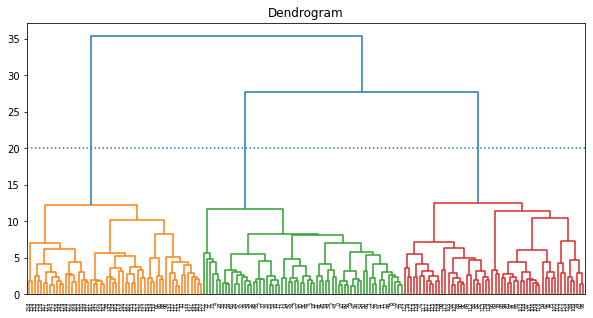

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(Wdata,method='ward')
plt.figure(figsize=(10,5))
plt.title("Dendrogram")
plt.hlines(20, 0, 6000, linestyles="dotted")
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

**_Dendogram cut off: 20_**

**_Number of Clusters: 3_**

In [20]:
agc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_agc = agc.fit(Wdata)
agc_clusters = model_agc.labels_
agc_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [22]:
output['Wine_Agglo']=agc_clusters              
output.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster,Wine_Agglo
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,2


__________________________________________________
**Principal Component Analysis**

In [23]:
pca = PCA()
pca.fit(Wdata)
pca.transform(Wdata)
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

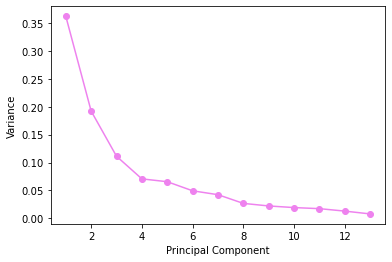

In [24]:
pca_val = np.arange(pca.n_components_) + 1
plt.plot(pca_val, pca.explained_variance_ratio_, 'o-', linewidth=1.5, color='violet')

plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

In [25]:
print("Percentage of total variance explained by each Principal Component:")
print(pca.explained_variance_ratio_)

Percentage of total variance explained by each Principal Component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]



**KMeans using PCA**

In [26]:
pca = PCA(n_components=8)
pca.fit(Wdata)
new_pca = pca.transform(Wdata)

In [27]:
n=range(1,11)
wd=[]
for i in n:
    model=KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(new_pca)
    wd.append(model.inertia_)
    print(model.inertia_)

2129.2859761611785
1474.4535480043357
1095.218630340201
998.3545520781316
932.4590302636171
866.3714690190787
810.3960179932095
756.4416659515514
711.5840131202151
675.8190831767251


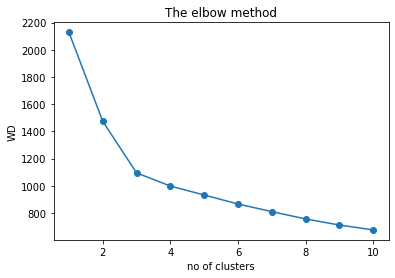

In [28]:
plt.plot(n,wd,'-o')
plt.xlabel('no of clusters')
plt.ylabel('WD')
plt.title("The elbow method")
plt.show()

**_Number of Clusters : 3_**

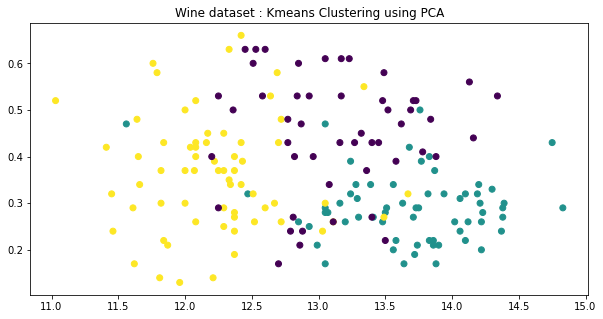

In [29]:
model = KMeans(n_clusters = 3 , init ="k-means++",max_iter = 1000 ,random_state=42)
model.fit(new_pca)
model_clusters = model.labels_
plt.figure(figsize=(10,5))

plt.scatter(data.iloc[:,0],data.iloc[:,7],c=model_clusters)
plt.title("Wine dataset : Kmeans Clustering using PCA")
plt.show()


**HC using PCA**

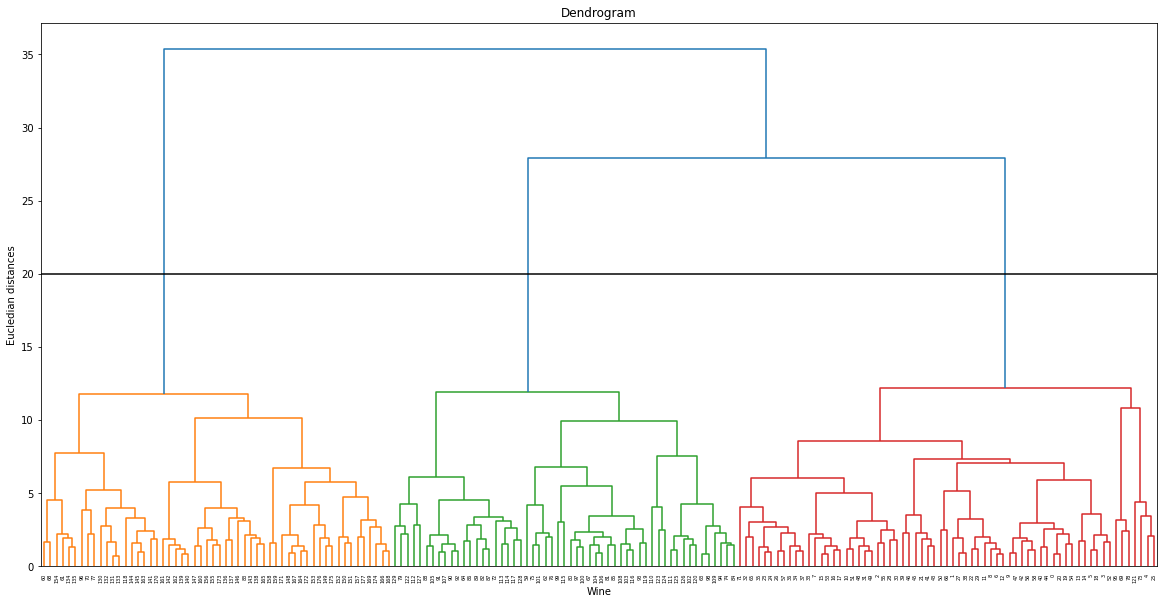

In [30]:
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(new_pca, method = "ward"))
plt.hlines(20,0,6000,colors="black" , linestyles="solid")
plt.title("Dendrogram")
plt.xlabel("Wine")
plt.ylabel("Eucledian distances")
plt.show()

**_Dendogram cut off: 20_**

**_Number of Clusters: 3_**

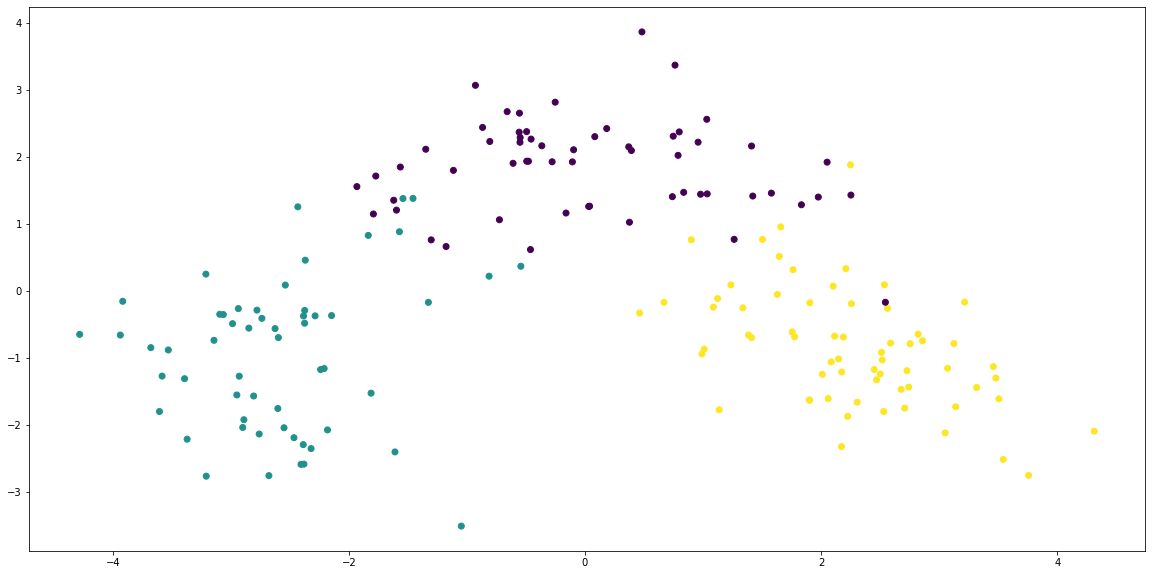

In [31]:
agc1 = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_agc1 = agc1.fit(Wdata)
agc1_clusters = model_agc1.labels_
plt.subplots(figsize=(20,10))
plt.scatter(new_pca[:,0],new_pca[:,1],c=agc1_clusters)

In [32]:
pca = PCA()
pca.fit(new_pca)
pca.transform(new_pca)
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         5.55111512e-17,  3.33066907e-16, -4.85722573e-17,
        -1.11022302e-16,  2.77555756e-16],
       [ 0.00000000e+00,  1.01795648e-16,  1.00000000e+00,
         1.34574551e-16,  2.34994730e-16,  2.08862788e-16,
         4.01770281e-16, -1.39671201e-16],
       [ 0.00000000e+00,  4.07647106e-17,  7.53379365e-17,
         1.00000000e+00,  3.19453106e-17,  3.63148581e-15,
        -1.35718492e-15, -3.03403045e-17],
       [-0.00000000e+00, -2.87897442e-16, -1.21107593e-16,
        -2.14817278e-16,  1.00000000e+00, -1.24086639e-14,
        -6.11370291e-16,  1.10655799e-16],
       [-0.00000000e+00,  3.46472656e-17, -2.17392517e-16,
        -3.53882101e-15,  1.24728996e-14,  1.00000000e+00,
         1.46341679e-15, -1.18970198e-15],
       [ 0.00000000e+00,  9.833946

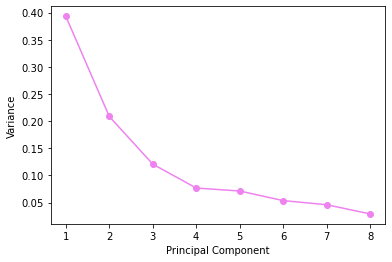

In [33]:
pca_val = np.arange(pca.n_components_) + 1
plt.plot(pca_val, pca.explained_variance_ratio_, 'o-', linewidth=1.5, color='violet')

plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

In [34]:
print("Percentage of total variance explained by each Principal Component:")
print(pca.explained_variance_ratio_)

Percentage of total variance explained by each Principal Component:
[0.39339072 0.20873726 0.12088597 0.07682263 0.07132655 0.05364002
 0.04606382 0.02913302]


In [35]:
output["pca-agg-cluster"] = agc1_clusters
output.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster,Wine_Agglo,pca-agg-cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,2,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,2,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,2,2
